In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa as lb

# Load the static annotations dataset
# Replace 'path_to_static_annotations.csv' with the actual path to the dataset
static_annotations = pd.read_csv(r'C:\Users\Daniele\Desktop\DEAM_project\DEAM_Annotations\annotations averaged per song\song_level\static_annotations_averaged_songs_1_2000.csv')
dynamic_annotations_arousal = pd.read_csv(r'C:\Users\Daniele\Desktop\DEAM_project\DEAM_Annotations\annotations averaged per song\dynamic (per second annotations)\arousal.csv')
dynamic_annotations_valence = pd.read_csv(r'C:\Users\Daniele\Desktop\DEAM_project\DEAM_Annotations\annotations averaged per song\dynamic (per second annotations)\valence.csv')
static_annotations.columns = static_annotations.columns.str.strip()
dynamic_annotations_arousal.columns = dynamic_annotations_arousal.columns.str.strip()
dynamic_annotations_valence.columns = dynamic_annotations_valence.columns.str.strip()

# Display the first few rows of the dataset
print("Dataset Preview:")
print(static_annotations.head())

# Basic information about the dataset
print("\nDataset Info:")
print(static_annotations.info())

# Summary statistics
print("\nSummary Statistics:")
print(static_annotations.describe())

Dataset Preview:
   song_id  valence_mean  valence_std  arousal_mean  arousal_std
0        2           3.1         0.94           3.0         0.63
1        3           3.5         1.75           3.3         1.62
2        4           5.7         1.42           5.5         1.63
3        5           4.4         2.01           5.3         1.85
4        7           5.8         1.47           6.4         1.69

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song_id       1744 non-null   int64  
 1   valence_mean  1744 non-null   float64
 2   valence_std   1744 non-null   float64
 3   arousal_mean  1744 non-null   float64
 4   arousal_std   1744 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 68.3 KB
None

Summary Statistics:
           song_id  valence_mean  valence_std  arousal_mean  arousal_std
count  1744.000000   

In [7]:
print("Columns in the dataset:")
print(static_annotations.columns)

Columns in the dataset:
Index(['song_id', 'valence_mean', 'valence_std', 'arousal_mean',
       'arousal_std'],
      dtype='object')


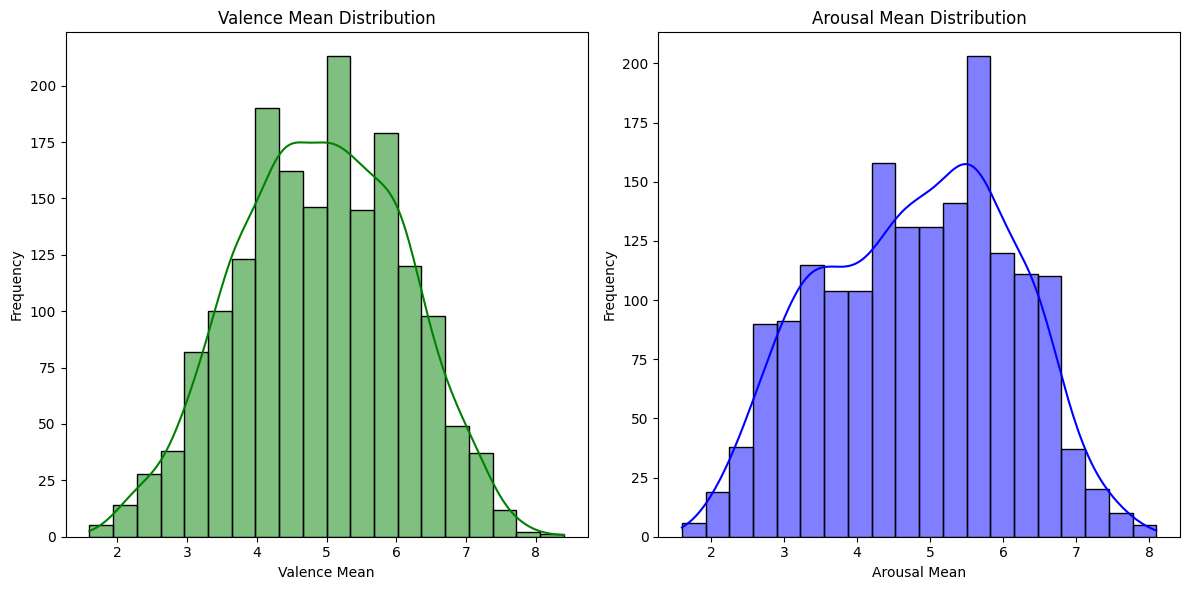

In [8]:
# Check the distribution of valence_mean and arousal_mean
plt.figure(figsize=(12, 6))

# Valence_mean distribution
plt.subplot(1, 2, 1)
sns.histplot(static_annotations['valence_mean'], kde=True, color='green', bins=20)
plt.title('Valence Mean Distribution')
plt.xlabel('Valence Mean')
plt.ylabel('Frequency')

# Arousal_mean distribution
plt.subplot(1, 2, 2)
sns.histplot(static_annotations['arousal_mean'], kde=True, color='blue', bins=20)
plt.title('Arousal Mean Distribution')
plt.xlabel('Arousal Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

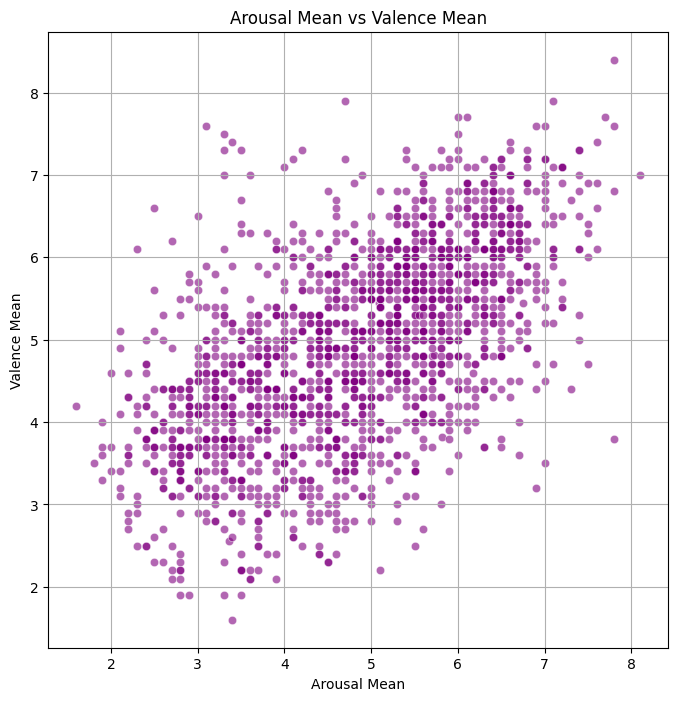

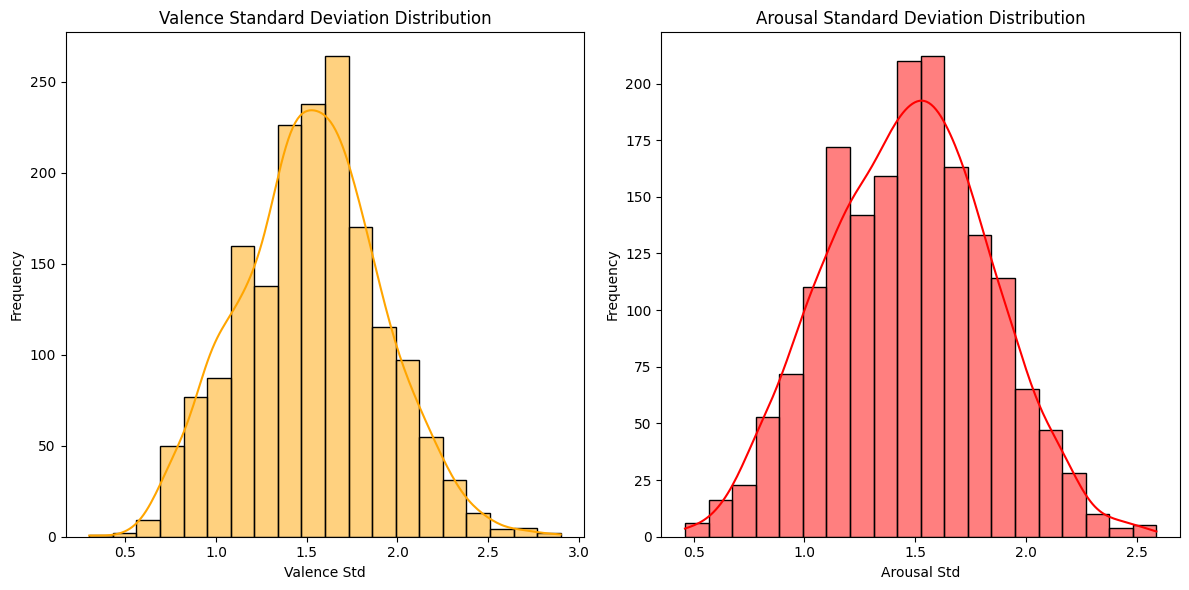

<Figure size 640x480 with 0 Axes>

In [9]:
# Scatter plot for arousal_mean vs valence_mean
plt.figure(figsize=(8, 8))
sns.scatterplot(x='arousal_mean', y='valence_mean', data=static_annotations, alpha=0.6, color='purple')
plt.title('Arousal Mean vs Valence Mean')
plt.xlabel('Arousal Mean')
plt.ylabel('Valence Mean')
plt.grid(True)
plt.show()

# Analyze variability (std columns)
plt.figure(figsize=(12, 6))

# Valence_std distribution
plt.subplot(1, 2, 1)
sns.histplot(static_annotations['valence_std'], kde=True, color='orange', bins=20)
plt.title('Valence Standard Deviation Distribution')
plt.xlabel('Valence Std')
plt.ylabel('Frequency')

# Arousal_std distribution
plt.subplot(1, 2, 2)
sns.histplot(static_annotations['arousal_std'], kde=True, color='red', bins=20)
plt.title('Arousal Standard Deviation Distribution')
plt.xlabel('Arousal Std')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

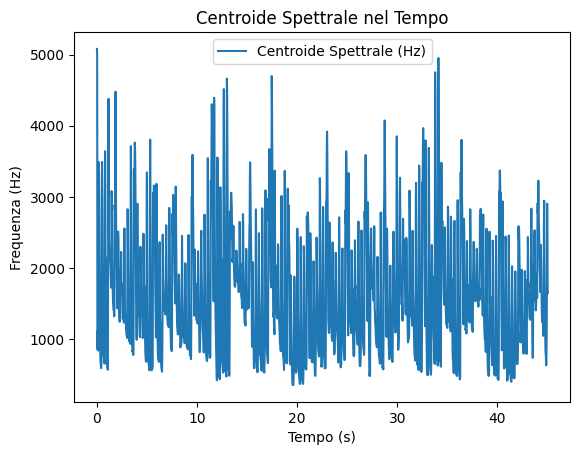

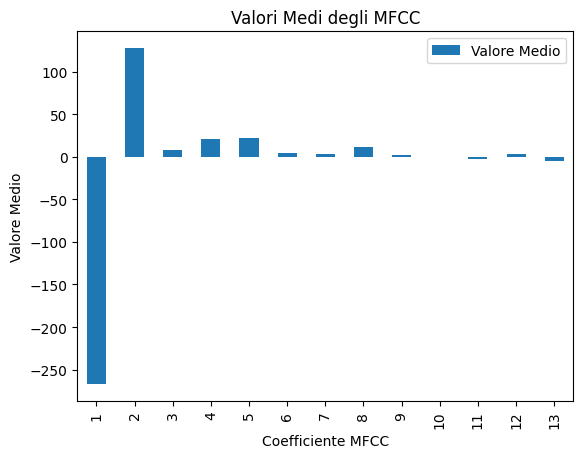

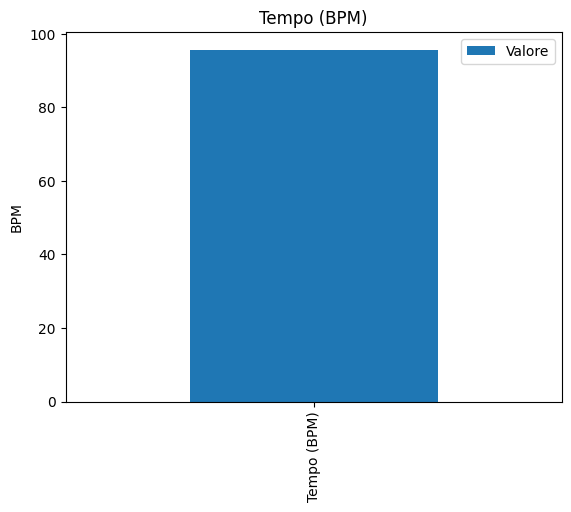

In [14]:

# Importa le librerie necessarie
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file audio (sostituisci "percorso_del_file.mp3" con il tuo file)
audio, sr = librosa.load(r"C:\Users\Daniele\Desktop\DEAM_project\DEAM_audio\MEMD_audio\10.mp3")

# Estrai il centroide spettrale per ogni frame
centroide = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]

# Estrai gli MFCC (13 coefficienti) per ogni frame
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Estrai il tempo (BPM)
tempo = librosa.feature.rhythm.tempo(y=audio, sr=sr)

# Crea un DataFrame per il centroide spettrale
# Associa ogni valore del centroide al suo tempo corrispondente
times = librosa.times_like(centroide, sr=sr)
df_centroide = pd.DataFrame({
    'Tempo (s)': times,
    'Centroide Spettrale (Hz)': centroide
})

# Crea un DataFrame per gli MFCC
# Calcola la media di ogni coefficiente MFCC lungo i frame
media_mfcc = np.mean(mfcc, axis=1)
df_mfcc = pd.DataFrame({
    'Coefficiente MFCC': range(1, 14),
    'Valore Medio': media_mfcc
})

# Crea un DataFrame per il tempo (BPM)
# Il tempo Ã¨ un singolo valore scalare
df_tempo = pd.DataFrame({
    'Caratteristica': ['Tempo (BPM)'],
    'Valore': [tempo[0]]
})

# Visualizza il centroide spettrale nel tempo
df_centroide.plot(
    x='Tempo (s)',
    y='Centroide Spettrale (Hz)',
    kind='line',
    title='Centroide Spettrale nel Tempo'
)
plt.xlabel('Tempo (s)')
plt.ylabel('Frequenza (Hz)')
plt.show()

# Visualizza i valori medi degli MFCC
df_mfcc.plot(
    x='Coefficiente MFCC',
    y='Valore Medio',
    kind='bar',
    title='Valori Medi degli MFCC'
)
plt.xlabel('Coefficiente MFCC')
plt.ylabel('Valore Medio')
plt.show()

# Visualizza il tempo (BPM)
df_tempo.plot(
    x='Caratteristica',
    y='Valore',
    kind='bar',
    title='Tempo (BPM)'
)
plt.xlabel('')
plt.ylabel('BPM')
plt.show()
